<a href="https://colab.research.google.com/github/KFerreira1221/MachineLearning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

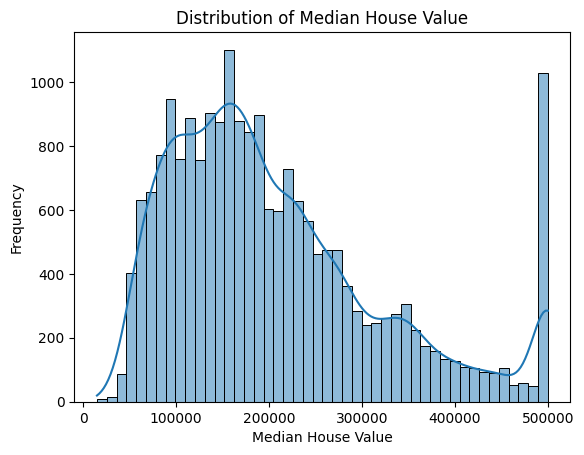

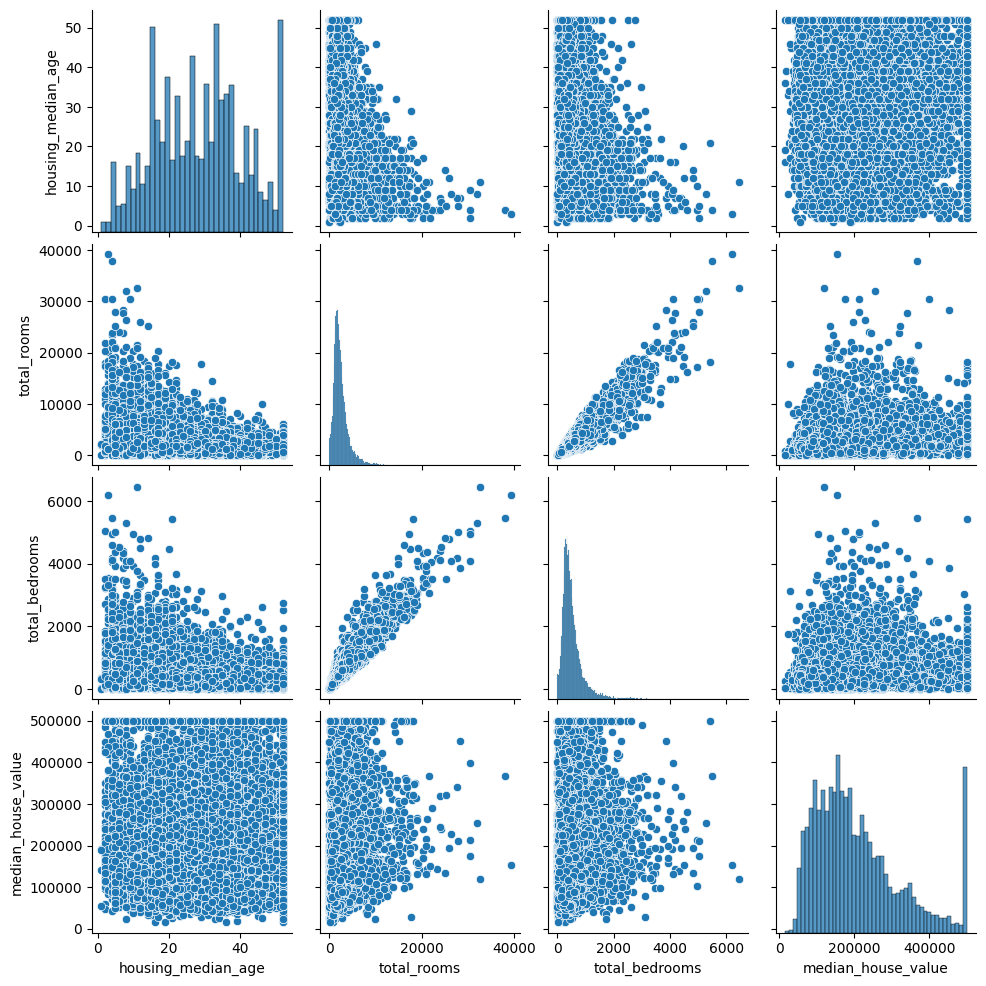

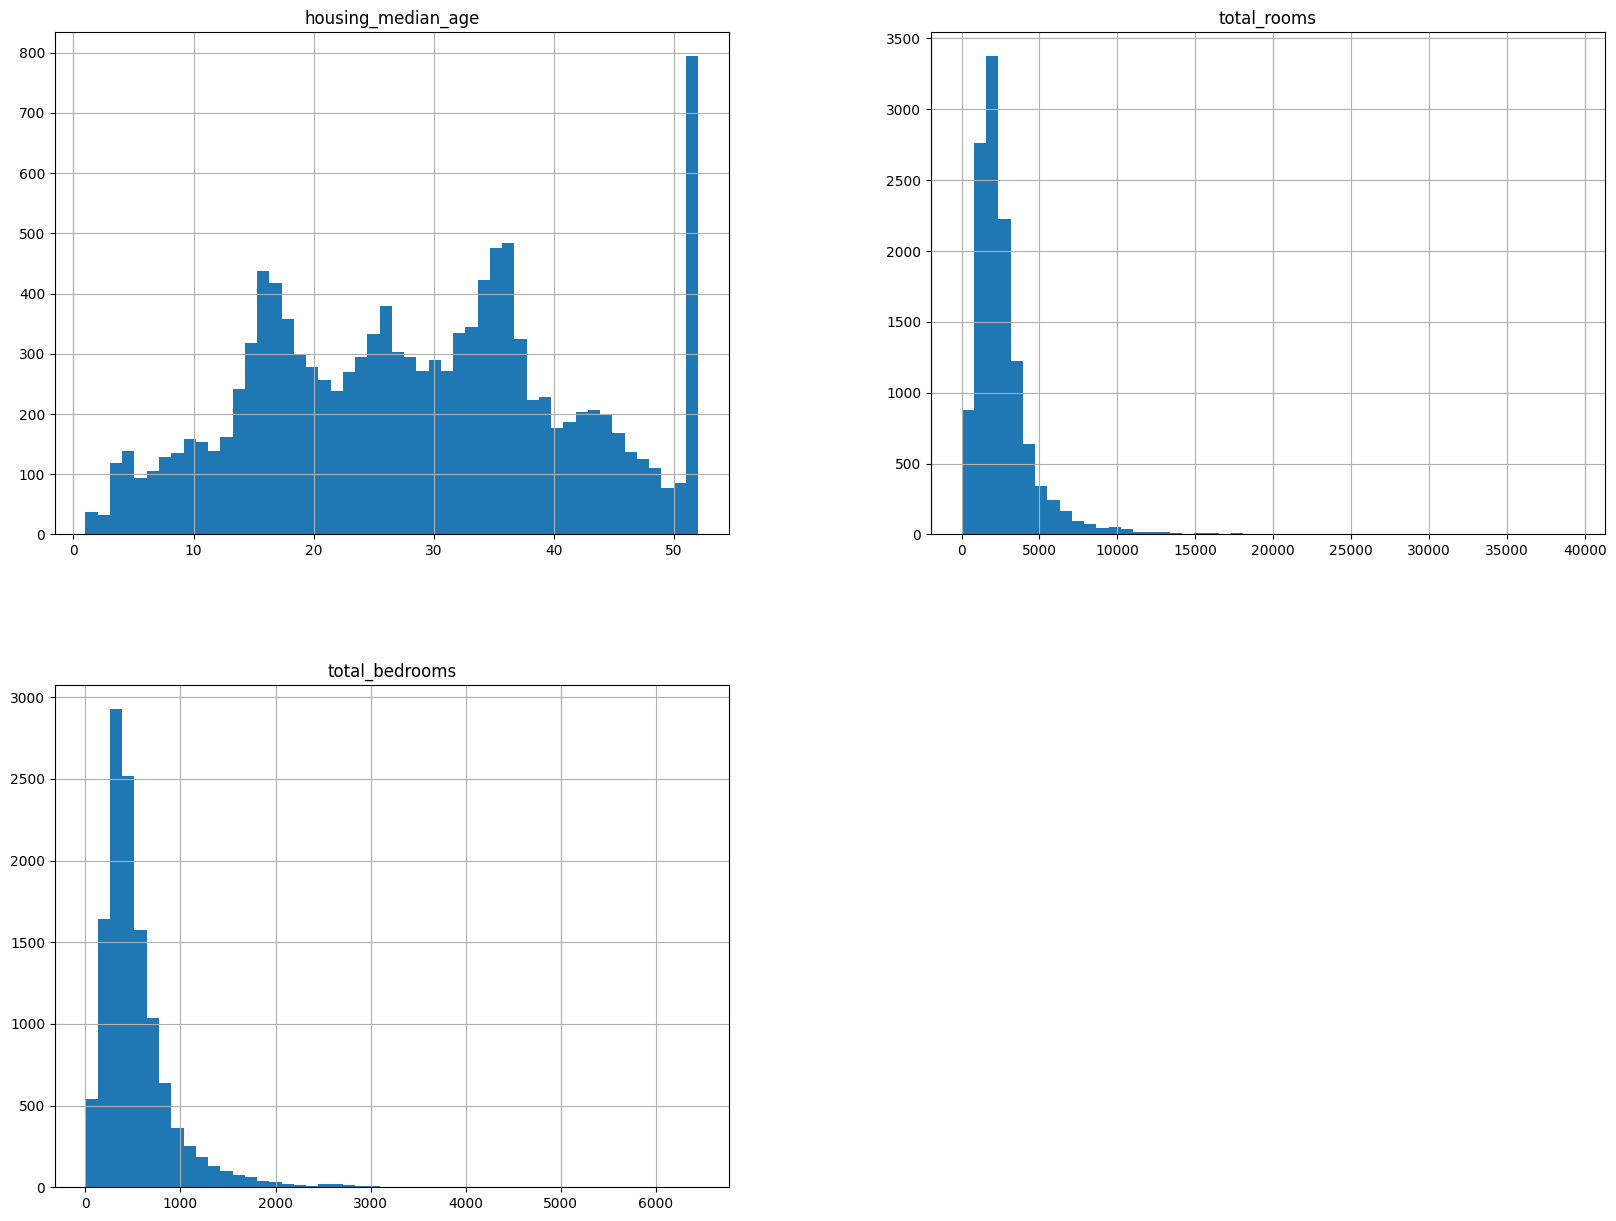

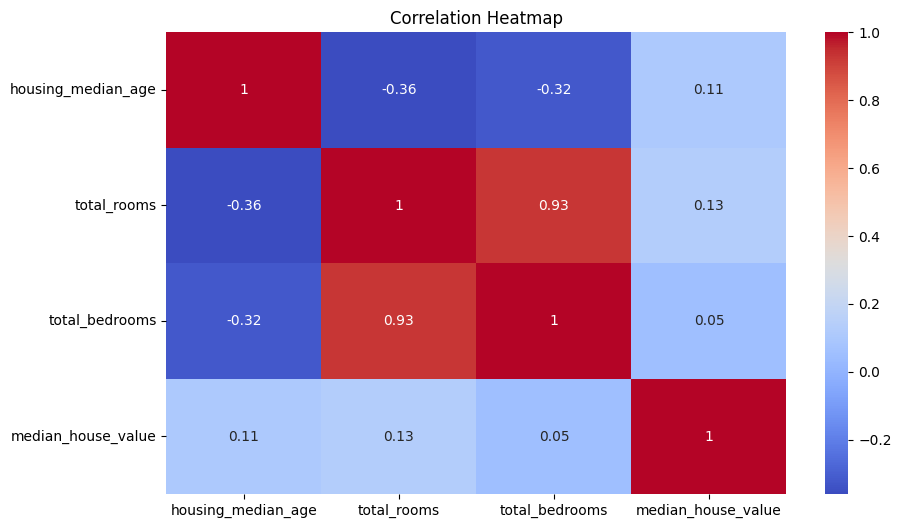

Validation Mean Squared Error: 12138527721.174166
Validation R-squared Score: 0.07631361488949351
Cross-validated Mean Squared Error: 12037334744.732737


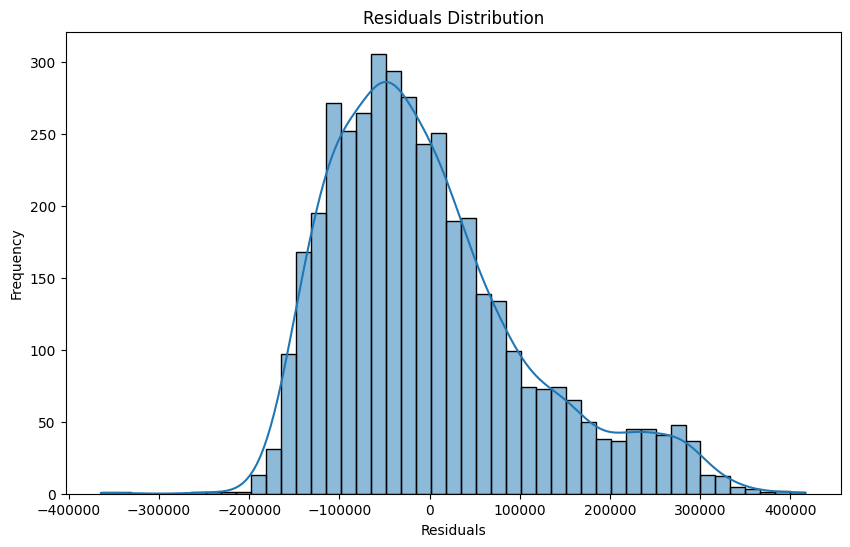

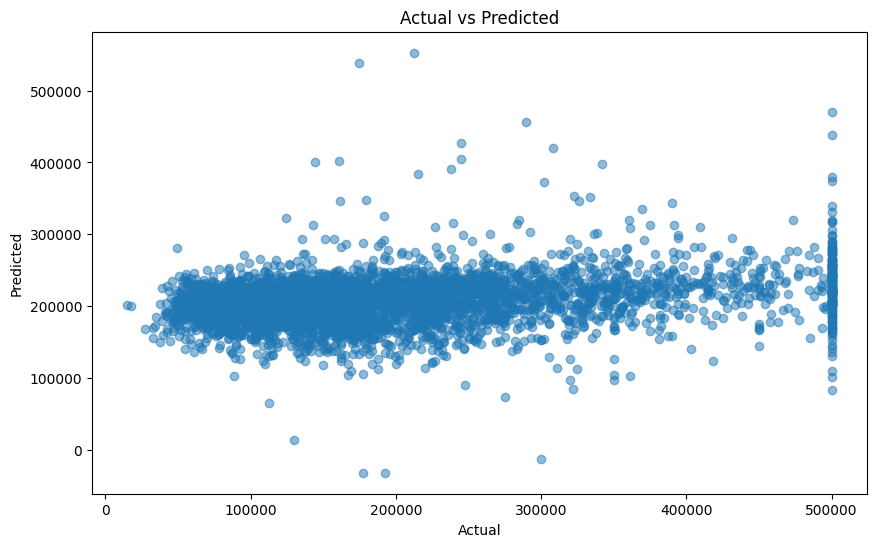

Prediction Set Mean Squared Error: 12460131478.280617
Prediction Set R-squared Score: 0.08885069431825432
Prediction for example input: 190522.82961770933


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
data = pd.read_csv('housing.csv')
data = data.dropna().drop_duplicates()
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
threshold = 3
data_no_outliers = data[(z_scores < threshold).all(axis=1)]
sns.histplot(data['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()
sns.pairplot(data, vars=['housing_median_age', 'total_rooms', 'total_bedrooms', 'median_house_value'])
plt.show()
X = data[['housing_median_age', 'total_rooms', 'total_bedrooms']]
y = data['median_house_value']
xy = data[['housing_median_age', 'total_rooms', 'total_bedrooms', 'median_house_value']]
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
X_train.hist(bins=50, figsize=(20, 15))
plt.show()
plt.figure(figsize=(10, 6))
sns.heatmap(xy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print("Validation Mean Squared Error:", mse_val)
print("Validation R-squared Score:", r2_val)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print("Cross-validated Mean Squared Error:", cv_mse)
residuals = y_val - y_val_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
##plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()
y_test_pred = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Prediction Set Mean Squared Error:", mse_test)
print("Prediction Set R-squared Score:", r2_test)
joblib.dump(model, 'house_prices.pkl')
loaded_model = joblib.load('house_prices.pkl')
example_features = np.array([[30, 2000, 500]])
example_features_scaled = scaler.transform(example_features)
example_prediction = loaded_model.predict(example_features_scaled)
print("Prediction for example input:", example_prediction[0])

(13932, 17)
(13932, 17)
    LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
0  25.891031 -80.160561  622280070620  440000.0        9375          1753   
1  25.891324 -80.153968  622280100460  349000.0        9375          1715   
2  25.891334 -80.153740  622280100470  800000.0        9375          2276   
3  25.891765 -80.152657  622280100530  988000.0       12450          2058   
4  25.891825 -80.154639  622280100200  755000.0       12800          1684   

   SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  SUBCNTR_DI  \
0              0     2815.9     12811.4       347.6    42815.3     37742.2   
1              0     4359.1     10648.4       337.8    43504.9     37340.5   
2          49206     4412.9     10574.1       297.1    43530.4     37328.7   
3          10033     4585.0     10156.5         0.0    43797.5     37423.2   
4          16681     4063.4     10836.8       326.6    43599.7     37550.8   

   HWY_DIST  age  avno60plus  month_sold  st

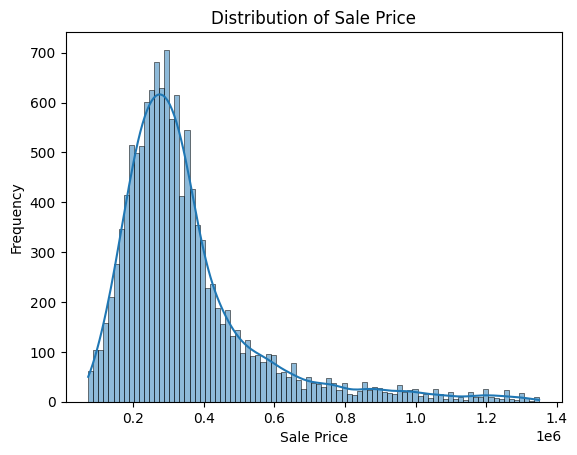

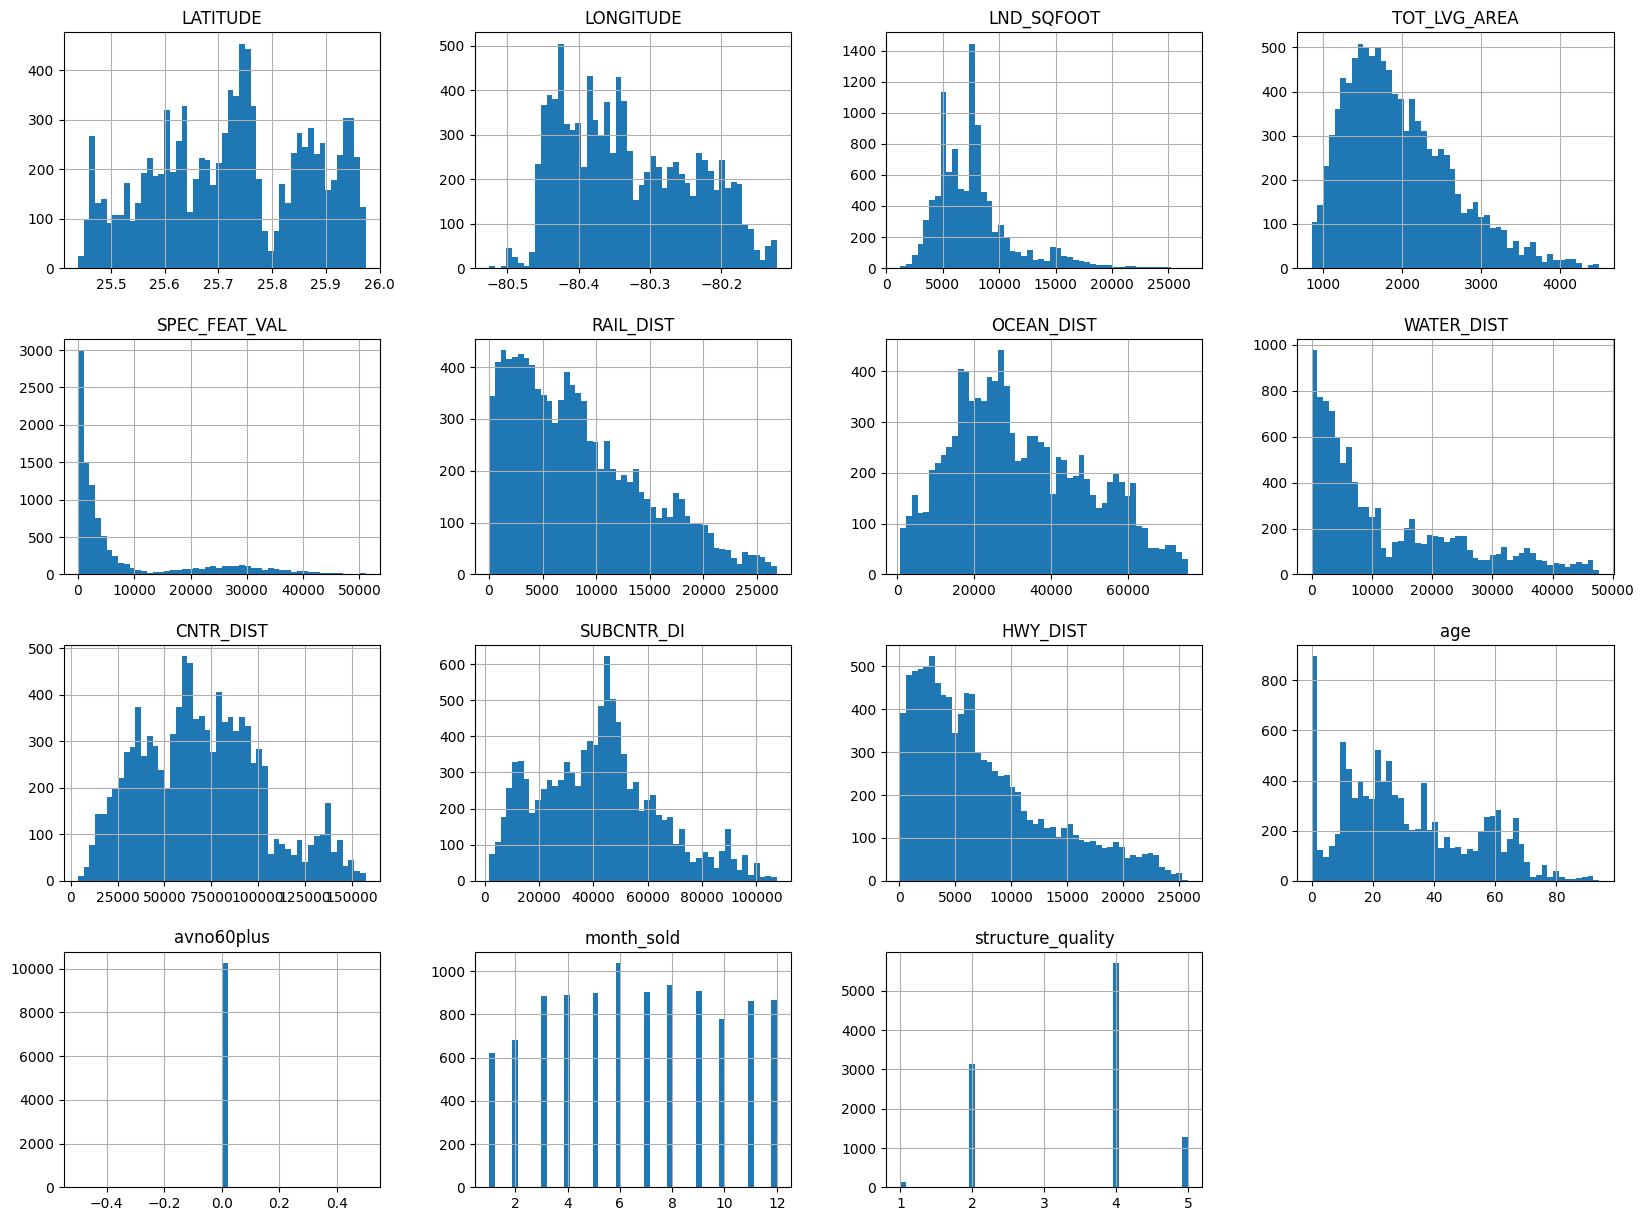

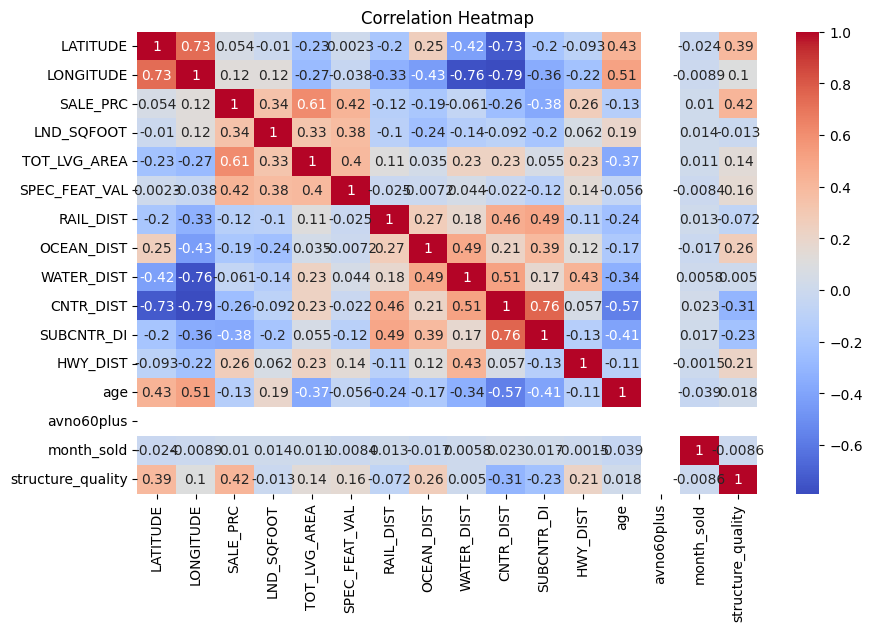

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Cross-validated Mean Squared Error: 12986110991.848255
[-1.32815251e+10 -1.31262238e+10 -1.25585852e+10 -1.32099071e+10
 -1.27543137e+10]


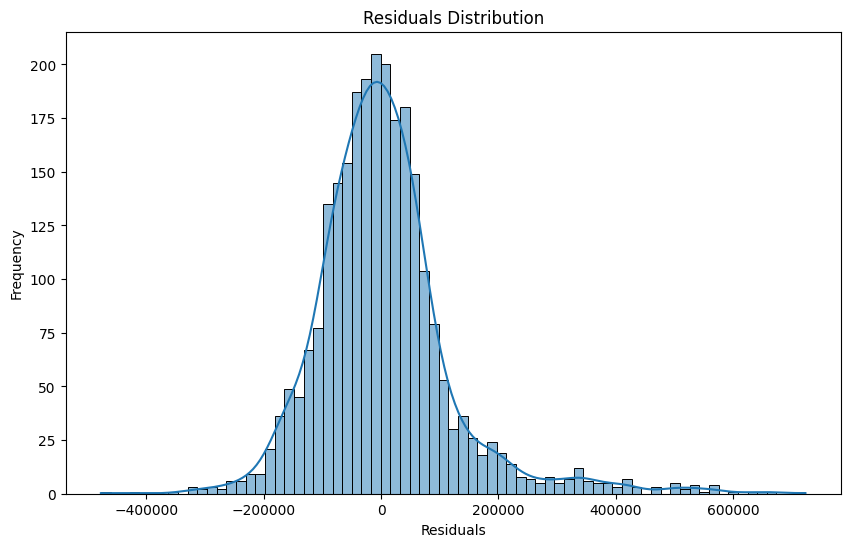

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.541e+13, tolerance: 4.165e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.620e+13, tolerance: 4.212e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.631e+13, tolerance: 4.164e

               model  best_score  \
0  linear_regression    0.690284   
1              lasso    0.690273   
2      decision_tree    0.816671   

                                         best_params  
0                                                 {}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}  


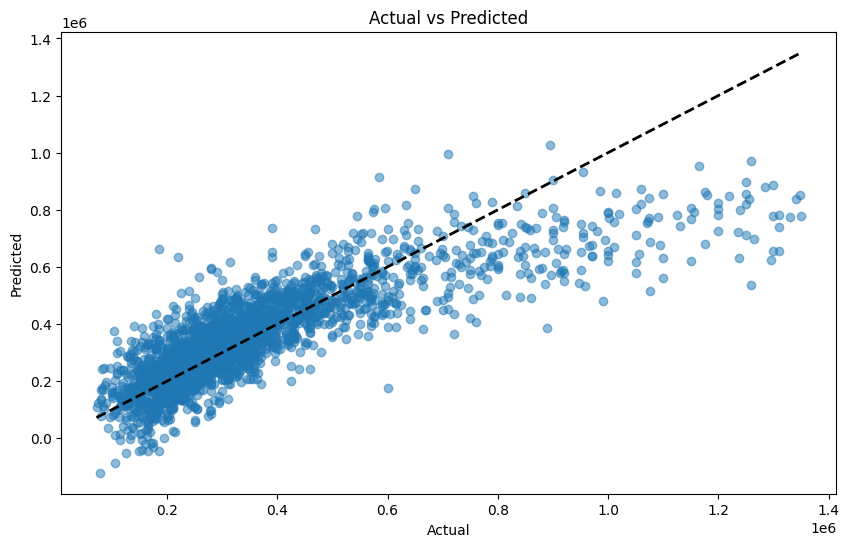

Decision Tree Model:
Validation Set Mean Squared Error: 0.0
Validation Set R-squared Score: 1.0
              Feature   Coefficient
0           Intercept  3.523450e+05
1            LATITUDE -6.149754e+04
2           LONGITUDE  4.543986e+04
3          LND_SQFOOT  1.382652e+04
4        TOT_LVG_AREA  1.003190e+05
5       SPEC_FEAT_VAL  2.650653e+04
6           RAIL_DIST  1.235542e+04
7          OCEAN_DIST -8.929297e+03
8          WATER_DIST -2.838336e+03
9           CNTR_DIST -7.742389e+04
10         SUBCNTR_DI -1.019202e+04
11           HWY_DIST  2.051877e+04
12                age -3.340995e+04
13         avno60plus -3.651621e-10
14         month_sold  5.371758e+02
15  structure_quality  6.121594e+04
The linear regression equation is:
SALE_PRC = 352344.97 + -61497.54*LATITUDE + 45439.86*LONGITUDE + 13826.52*LND_SQFOOT + 100319.02*TOT_LVG_AREA + 26506.53*SPEC_FEAT_VAL + 12355.42*RAIL_DIST + -8929.30*OCEAN_DIST + -2838.34*WATER_DIST + -77423.89*CNTR_DIST + -10192.02*SUBCNTR_DI + 20518.77*H

In [1]:
## Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
## Load the housing data and then clean it by removing duplicates or rows with missing values
data = pd.read_csv('miami-housing.csv')
print(data.shape)
data = data.dropna().drop_duplicates()
print(data.shape)
print(data.head())
## Detect the outliers and remove them
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
threshold = 3
data_no_outliers = data[(z_scores < threshold).all(axis=1)]
## Visualize the distribution of the target variable
sns.histplot(data_no_outliers['SALE_PRC'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()
## Define X, y, and xy
X = data_no_outliers.drop(['SALE_PRC','PARCELNO'],axis='columns')
y = data_no_outliers['SALE_PRC']
xy = data_no_outliers.drop(['PARCELNO'],axis='columns')
## Visualize the distribution of features in the training set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=10)
X_train.hist(bins=50, figsize=(20, 15))
plt.show()
## Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
## Visualize the correlation between features and the target variable
plt.figure(figsize=(10, 6))
sns.heatmap(xy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
## Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
model.score(X_test,y_test)
y_val_pred = model.predict(X_val_scaled)
## Perform cross-validation to assess the model's performance
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print("Cross-validated Mean Squared Error:", cv_mse)
print(cv_scores)
## Calculate and visualize the distribution of residuals
residuals = y_val - y_val_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
## Find the best model
error_score='raise'
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {'model': LinearRegression(), 'params': {}},
        'lasso': {'model': Lasso(), 'params': {'alpha': [1, 2], 'selection': ['random', 'cyclic']}},
        'decision_tree': {'model': DecisionTreeRegressor(), 'params': {'criterion': ['mse', 'friedman_mse'], 'splitter': ['best', 'random']}}
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(find_best_model_using_gridsearchcv(X, y))
## Visualize the relationship between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()
## Create the decision tree
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train_scaled, y_train)
y_val_pred_dt = dt_regressor.predict(X_val_scaled)
mse_dt = mean_squared_error(y_val, y_val_pred_dt)
r2_dt = r2_score(y_val, y_val_pred_dt)
print("Decision Tree Model:")
print("Validation Set Mean Squared Error:", mse_dt)
print("Validation Set R-squared Score:", r2_dt)
## Create the linear regression equation
intercept = model.intercept_
coefficients = model.coef_
equation_df = pd.DataFrame({'Feature': ['Intercept'] + X.columns.tolist(), 'Coefficient': [intercept] + coefficients.tolist()})
print(equation_df)
equation = "SALE_PRC = " + " + ".join([f"{coef:.2f}*{feature}" if feature != 'Intercept' else f"{coef:.2f}" for feature, coef in zip(equation_df['Feature'], equation_df['Coefficient'])])
print(f"The linear regression equation is:\n{equation}")
## Evaluate the model on the test set
y_test_pred = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Prediction Set Mean Squared Error:", mse_test)
print("Prediction Set R-squared Score:", r2_test)
joblib.dump(model, 'house_prices.pkl')
## Save the trained model
loaded_model = joblib.load('house_prices.pkl')
## Load the trained model and make a prediction on an example input